# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

In [2]:
%load_ext autoreload
%autoreload 2

# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [3]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state() # get id for the current seed state
for i in range(3):
    np.random.set_state(state) # set state to the stored id for state
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

See A1.py

## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i)
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [4]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)

# define transformation function
def g(x, omega):
    g_vec = x.copy() 
    g_vec[x>omega] = omega 
    g_vec[x<-omega] = -omega 
    return g_vec
    
# draw random values of x
x  = np.random.normal(loc=0, scale=sigma, size=N)

# transform x
g_vec = g(x, omega)

# compute moments
g_mean = 1/N*sum(g_vec)
g_Var = 1/N*sum((g_vec-g_mean)**2)

print(f'Mean:     {g_mean:5.2f}')
print(f'Variance: {g_Var:5.2f}')

Mean:     -0.00
Variance:  2.70


**Answer:**

See A2.py

## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

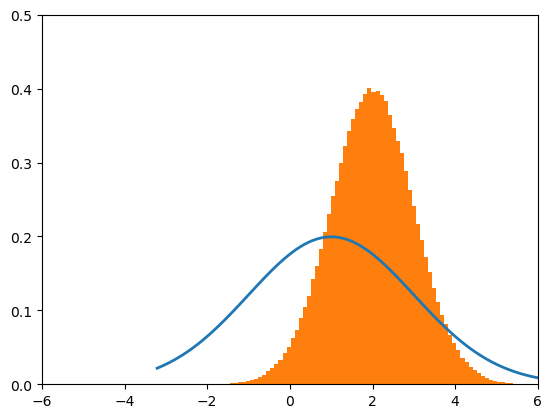

In [5]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    # missing line, x_low =
    x_low = X.min()
    # missing line, x_high =
    x_high = X.max()
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

In [6]:
# write your code here
import ipywidgets as widgets

widgets.interact(fitting_normal,
                 mu_guess = widgets.FloatSlider(description='$\mu$', min=-5, max=5, step=0.05),
                 sigma_guess = widgets.FloatSlider(description='$\sigma$', min=10e-6, max=5, setp=0.05),
                 X = widgets.fixed(X));

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=5.0, min=-5.0, step=0.05), FloatSlider(…

**Answer:**

See A3.py

## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [6]:
# write your code here
#import mymodule
#mymodule.myfun(3)


**Answer:**

See A4.py

## Git

1. Try to go to your own personal GitHub main page and create a new repository. Then put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [7]:
from scipy import optimize

In [8]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
np.random.seed(seed)

## b1. preferences
alpha_tilde = np.random.normal(loc=mu, scale=sigma, size=N)
alpha = np.fmax(mu_low, np.fmin(mu_high, alpha_tilde))

## b2. endowments
e1 = np.random.exponential(scale=beta1, size=N)
e2 = np.random.exponential(scale=beta2, size=N)


# c. demand function
def demand_x1(alpha, e1, e2, p1):
    I = e1*p1 + e2
    x1 = alpha*I/p1
    return x1

def demand_x2(alpha, e1, e2, p1):
    I = e1*p1 + e2
    x2 = (1-alpha)*I
    return x2

# d. excess demand function
# We just need to find prices that clear the market for x1. Market for x2 will clear by Walras' law.
# We let x2 be the numeraire.
def excess_demand_x1(alphas, e1_vec, e2_vec, p1):
    ag_supply_x1 = e1_vec.sum()
    ag_demand_x1 = demand_x1(alphas, e1_vec, e2_vec, p1).sum()
    return ag_demand_x1 - ag_supply_x1


# e. find equilibrium function
def find_equilibrium(alphas, e1_vec, e2_vec, p1_min=10e-6, p1_max=3, Np=5,do_grid=True):

    # define objective function
    obj = lambda p1: excess_demand_x1(alphas, e1_vec, e2_vec, p1)

    # we might do a rough grid search to find general location for root
    if do_grid:
        p1_grid = np.linspace(p1_min, p1_max, Np)
        demand_grid = np.array([obj(p1) for p1 in p1_grid])
        p1_min = p1_grid[np.max(np.where(demand_grid >0))] # smallest value of p1 with positive excess demand for x1
        p1_max = p1_grid[np.min(np.where(demand_grid <0))] # largest value of p1 with negative excess demand for x1

    # we now know that the clearing price must be in the interval (p1_min, p1_max)
    # apply root finder:
    res = optimize.root_scalar(obj, bracket=(p1_min, p1_max))
    assert res.converged # verify root finder wass successful

    # return clearing price
    return res.root

# f. call find equilibrium function
clearing_p1 = find_equilibrium(alpha, e1, e2, do_grid = True)
print(f'Clearing prices:  p1 = {clearing_p1:3.2f} and p2 = 1')


# Extra: Verify that the market for x2 also clears
ag_demand_x2 = demand_x2(alpha, e1, e2, clearing_p1).sum()
ag_supp_x2 = e2.sum() 
print(f'Excess demand for x2: {ag_demand_x2 - ag_supp_x2:5.3f}')

Clearing prices:  p1 = 1.62 and p2 = 1
Excess demand for x2: 0.000


**Hint:** The code structure is exactly the same as for the exchange economy considered in the lecture. The code for solving that exchange economy is reproduced in condensed form below.

In [9]:
# a. parameters
N = 1000
k = 2
mu_low = 0.1
mu_high = 0.9
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,k):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,k))
    
    # b. supply
    supply = k*alphas.size
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,k,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# e. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,k,kappa=kappa,eps=eps)

  0: p1 =   1.33690689 -> excess demand ->  -630.93108302
  1: p1 =   1.27551407 -> excess demand ->  -613.92820358
  2: p1 =   1.21593719 -> excess demand ->  -595.76882769
  3: p1 =   1.15829785 -> excess demand ->  -576.39340748
  4: p1 =   1.10272273 -> excess demand ->  -555.75114178
   ...
 25: p1 =   0.53269252 -> excess demand ->   -53.80455643
 50: p1 =   0.50897770 -> excess demand ->    -0.27125769
 75: p1 =   0.50886603 -> excess demand ->    -0.00120613
100: p1 =   0.50886553 -> excess demand ->    -0.00000536
125: p1 =   0.50886553 -> excess demand ->    -0.00000002
130: p1 =   0.50886553 -> excess demand ->    -0.00000001


**Answers:**

See A5.py

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [7]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = 'some text here'

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.array([0])

# c. save with pickle
with open(f'data.p', 'wb') as f:
    # missing line
    pickle.dump(my_data, f)
    
# d. save with numpy
# missing line, np.savez(?)
np.savez('data.npz', **my_np_data)
    
# a. try
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
try:
    load_all()
except:
    print('failed')


variables loaded without error


**Answer:**

See A6.py

# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [11]:
# a. choose parameters
N = 10000
J = 3

# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower
#print(Sigma)

# c. draw random numbers
seed = 2023
np.random.seed(seed)

## preferences
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
#print(np.mean(alphas,axis=0))
#print(np.corrcoef(alphas.T))

## endowments
# Here, I just draw endowments from independent uniform distributions
endowments = np.random.uniform(size=(N,J))

# d. Demand function
# write your code here
def demand_multi(alphas, endowments, prices):
    alphas_scaled = alphas/np.sum(alphas, axis=1, keepdims=True) # ensure alphas sum to 1

    I = (endowments@prices).reshape(-1,1) # matrix product to compute income.  The .reshape(-1,1)
                                         # is to make I a (N,1)-array, so we can do elementwise multiplication
                                         # with alphas later
                                    
    dem = (I*alphas_scaled/prices) # *- and /-operators on NumPy-arrays mean elementwise multiplication/division,
                                   # so this gives us demand as fixed income shares.

    return dem

# e. Excess demand
def excess_demand(alphas, endowments, input_prices):
    # input variable prices must be J-1 prices. Last good is numeraire
    prices = np.append(input_prices, 1)

    supp = endowments.sum(axis=0)
    dem = demand_multi(alphas, endowments, prices).sum(axis=0)

    excess_demand = supp-dem

    # return excess demand for first J-1 goods - last market clears by Walras' law
    return excess_demand[:-1]

# f. Find clearing prices
def find_equilibrium_multi(alphas, endowments, p_start=1):
    # define objective function
    obj = lambda p: excess_demand(alphas, endowments,  p)

    # apply root finder:
    J_1 = alphas.shape[-1]-1
    p_start = np.ones(J_1)*p_start
    res = optimize.root(obj, x0=p_start)
    assert res.success # verify root finder wass successful

    # return clearing price
    return res.x

# g. Solve problem
output_prices = find_equilibrium_multi(alphas, endowments)
opt_price_vec = np.append(output_prices, 1)
print(f'Clearing prices: {opt_price_vec.round(4)}')

# Extra: verify that the J'th market clears
dem_J = demand_multi(alphas, endowments, opt_price_vec)[:,-1].sum()
sup_J = endowments[:,-1].sum()
print(f'Excess demand of good J: {dem_J-sup_J:5.7f}')


Clearing prices: [0.8709 1.0021 1.    ]
Excess demand of good J: -0.0000000
